# Data Dive Week 6: Logistic Regression 

This week we take a look at *logistic regression*, the first classification model we'll be covering in class. We'll be using `scikit-learn` in today's exercise. 


***

As we discussed last week, logisitic regression is a *classification model* - meaning that it is designed to idenfity the likelihood that a given observed data point belongs to set class, or category. Today we'll be looking at a real world application of logistic regression using July 2019 flight data from the U.S. Department of Transportation's [Bureau of Transportation Statistics](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236). 
***

![flights](https://media.giphy.com/media/Btn42lfKKrOzS/source.gif)


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('https://grantmlong.com/data/Flights-July2019.csv')
print(df.shape)
print(list(df))
df.sample(5).transpose()

(659029, 56)
['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 55']


,367517,178773,407814,324888,590717
YEAR,2019,2019,2019,2019,2019
QUARTER,3,3,3,3,3
MONTH,7,7,7,7,7
DAY_OF_MONTH,19,4,7,28,1
DAY_OF_WEEK,5,4,7,7,1
FL_DATE,2019-07-19,2019-07-04,2019-07-07,2019-07-28,2019-07-01
OP_UNIQUE_CARRIER,WN,OO,WN,AA,OO
OP_CARRIER,WN,OO,WN,AA,OO
TAIL_NUM,N437WN,N297SY,N745SW,N903AN,N132SY
OP_CARRIER_FL_NUM,5527,3502,3608,1113,5561


# Identifying a Target

If you're a traveler, which variable might make the most to predict? How about if you are a travel booking site?

Create and/or summarize the variable that you think makes the most sense to model. What percentage of flights fall into this category?


In [3]:
df['CANCELLED'].mean()

0.019616739172327775

In [4]:
df['DIVERTED'].mean()

0.003520330668301395

In [5]:
(df['ARR_DELAY']>=30).mean()

0.14077984428606327

In [6]:
df['bad'] = df['DIVERTED'] + df['CANCELLED'] + (df['ARR_DELAY']>=30)

In [7]:
df['bad'].mean()

0.16391691412669246

In [8]:
df['bad'].value_counts()

0.0    551003
1.0    108026
Name: bad, dtype: int64

In [9]:
df['bad'].isnull().sum()

0

### Ensuring our target has valid values

We need to ensure that all of our target observations have valid values in order to ensure our model will run properly. 

In [10]:
target = 'bad'
df = df.loc[df[target].notna()] 


# Exploring Our Data

As we start to put together a model, we'll want to think about the features that might make sense to use in our model. Ideally, these should be:
 1. Available in advance.
 2. Sensibly related to our target.
 3. Capable of being encoded into a model. 
 
Let's summarize some potential features, and look at the ways in which they correlate with our target.

### Categorical Data

To examine how well some potential categorical variables might work, we can summarize our target by each of the categorical values.

In [11]:
potential_feature = 'DAY_OF_WEEK'

if df[potential_feature].nunique()<=20:

    print(
        df[[potential_feature, target]]
        .groupby(potential_feature)
        .agg(['mean', 'count'])
        .sort_values(by=(target, 'mean'), ascending=False)
    )

else:

    print(
        df[[potential_feature, target]]
        .groupby(potential_feature)
        .agg(['mean', 'count'])
        .sort_values(by=(target, 'mean'), ascending=False).head(40)
    )

    print()

    print(
        df[[potential_feature, target]]
        .groupby(potential_feature)
        .agg(['mean', 'count'])
        .sort_values(by=(target, 'mean'), ascending=False).tail(40)
    )

                  bad        
                 mean   count
DAY_OF_WEEK                  
4            0.195863   83834
1            0.169959  110015
7            0.164262   86703
3            0.161162  108512
6            0.160105   76556
5            0.151609   85272
2            0.147896  108137


### Continuous Variables 

For continuous features, evaluating their predictive potential is slightly more straightforward. We can look at the distribution of the potential features by each class to gauge their relationship to the target.

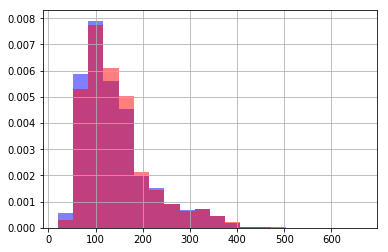

In [12]:
potential_feature = 'CRS_ELAPSED_TIME'

df.loc[(df[target]==0), potential_feature].hist(bins=20, alpha=.5, density=True, color='blue')
df.loc[(df[target]==1), potential_feature].hist(bins=20, alpha=.5, density=True, color='red')

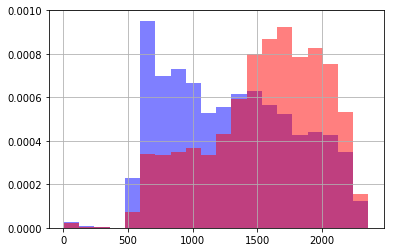

In [13]:
potential_feature = 'CRS_DEP_TIME'

df.loc[(df[target]==0), potential_feature].hist(bins=20, alpha=.5, density=True, color='blue')
df.loc[(df[target]==1), potential_feature].hist(bins=20, alpha=.5, density=True, color='red')

# Building Feature Sets

For each of the categorical features we'd like to include, we'll have to break each category - or a combination of categories - into a series of binary features. For continuous features, we'll have to ensure each row we'd like to include has a valid value. 

In [14]:
####################################################################        
# Categorical features

all_features = []
categorical_features = ['OP_CARRIER', 'DEST', 'ORIGIN', 'DAY_OF_WEEK']
top = 10

for each_feature in categorical_features:
    for f in df[each_feature].value_counts().index[:top].to_list():
        df[each_feature+'='+str(f)] = (df[each_feature]==f)*1
        all_features.append(each_feature+'='+str(f))

        
####################################################################        
# Continuous features

continuous_features = ['DISTANCE', 'CRS_ELAPSED_TIME']
df.loc[df.CRS_ELAPSED_TIME.isna(), 'CRS_ELAPSED_TIME'] = 180

for each_feature in continuous_features:
    all_features.append(each_feature)

        
####################################################################        
# Grouped Categorical features

df['MORNING'] = (df['CRS_DEP_TIME']<1000)*1
df['AFTERNOON'] = ((df['CRS_DEP_TIME']>=1000) & (df['CRS_DEP_TIME']<=1500))*1
df['EVENING'] = (df['CRS_DEP_TIME']>1500)*1
        
all_features = all_features + ['MORNING', 'AFTERNOON', 'EVENING']
      
####################################################################        
# Adding a constant
df['constant'] = 1
all_features.append('constant')
    
    
df[all_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OP_CARRIER=WN,659029.0,0.181088,0.385091,0.0,0.0,0.0,0.0,1.0
OP_CARRIER=DL,659029.0,0.137797,0.344687,0.0,0.0,0.0,0.0,1.0
OP_CARRIER=AA,659029.0,0.124124,0.329723,0.0,0.0,0.0,0.0,1.0
OP_CARRIER=OO,659029.0,0.111895,0.315237,0.0,0.0,0.0,0.0,1.0
OP_CARRIER=UA,659029.0,0.085134,0.279082,0.0,0.0,0.0,0.0,1.0
OP_CARRIER=MQ,659029.0,0.044861,0.207000,0.0,0.0,0.0,0.0,1.0
OP_CARRIER=YX,659029.0,0.042726,0.202240,0.0,0.0,0.0,0.0,1.0
OP_CARRIER=B6,659029.0,0.038762,0.193026,0.0,0.0,0.0,0.0,1.0
OP_CARRIER=OH,659029.0,0.038312,0.191950,0.0,0.0,0.0,0.0,1.0
OP_CARRIER=AS,659029.0,0.037317,0.189538,0.0,0.0,0.0,0.0,1.0


# Training A Model in `statsmodels`

As we saw last week, `statsmodels` can be helpful if we want to visualize the summary statistics of our output. Just like linear regression, it only takes a few lines of code to use `statsmodels` to fit the model and print the result. 

In [15]:
logit = sm.Logit(df[target], df[all_features])
result = logit.fit()
print(result.summary())

         Current function value: 0.417373
         Iterations: 35


/Users/grant/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                    bad   No. Observations:               659029
Model:                          Logit   Df Residuals:                   658988
Method:                           MLE   Df Model:                           40
Date:                Sun, 20 Oct 2019   Pseudo R-squ.:                 0.06441
Time:                        11:51:56   Log-Likelihood:            -2.7506e+05
converged:                      False   LL-Null:                   -2.9400e+05
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
OP_CARRIER=WN       -0.3416      0.013    -27.091      0.000      -0.366      -0.317
OP_CARRIER=DL       -0.3295      0.015    -22.706      0.000      -0.358      -0.301
OP_CARRIER=AA        0.0746 

/Users/grant/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/grant/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/grant/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/grant/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Training A Model in `sklearn`

As we saw the past two weeks, `statsmodels` can be helpful if we want to visualize the summary statistics of our output. Documentation for the `LogisticRegression` object can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [16]:
X = df[all_features].values
y = df[target].values


##### Let's fit and score the model:

In [17]:
clf = LogisticRegression(random_state=20191016).fit(X, y)
print('The accuracy of our model is %0.1f%%' % (clf.score(X, y)*100))


/Users/grant/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of our model is 83.6%


In [18]:
clf.predict(X).sum()

914.0

In [19]:
sum(y)

108026.0

##### Let's see where we went right and where we went wrong:

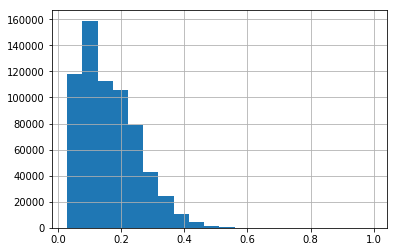

In [20]:
df['likelihood'] = clf.predict_proba(X)[:,1]

df['likelihood'].hist(bins=20)


Let's take a look at the top values where we failed to predict a bad flight: 

In [21]:
interesting_cols = ['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'likelihood', target]

(
    df.loc[(df[target]==1), interesting_cols]
    .sort_values(by='likelihood', ascending=True)
    .head(10)
)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,likelihood,bad
421591,2019-07-19,AS,PDX,LAX,530,0.030417,1.0
424435,2019-07-23,AS,ANC,SCC,735,0.031476,1.0
413325,2019-07-09,AS,ANC,SCC,735,0.031476,1.0
418971,2019-07-16,AS,OME,ANC,840,0.031580,1.0
272878,2019-07-09,DL,LAX,MSP,730,0.031942,1.0
415698,2019-07-12,AS,ADQ,ANC,750,0.031954,1.0
100461,2019-07-05,AS,ADQ,ANC,750,0.031954,1.0
416024,2019-07-12,AS,PDX,LAX,700,0.032104,1.0
424938,2019-07-23,AS,FAI,ANC,800,0.032595,1.0
424526,2019-07-23,AS,ANC,FAI,600,0.032595,1.0


Now let's take a look at where we predicted a bad flight, but the flights were not bad.

In [22]:
(
    df.loc[(df[target]==0), interesting_cols]
    .sort_values(by='likelihood', ascending=False)
    .head(10)
)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,likelihood,bad
460595,2019-07-04,YX,DEN,DRO,1905,0.748476,0.0
109668,2019-07-04,B6,JFK,ORD,1630,0.621942,0.0
439946,2019-07-25,B6,JFK,ORD,1630,0.621942,0.0
584597,2019-07-25,AA,LGA,ORD,1730,0.613074,0.0
159841,2019-07-04,UA,ORD,LGA,1800,0.608782,0.0
585430,2019-07-25,AA,LGA,ORD,1630,0.607773,0.0
585412,2019-07-04,AA,LGA,ORD,1636,0.605113,0.0
583543,2019-07-25,AA,LGA,ORD,1930,0.605113,0.0
556131,2019-07-25,NK,ORD,LGA,1736,0.603462,0.0
556110,2019-07-04,NK,ORD,LGA,1738,0.600792,0.0


Finally, let's take a closer look at our summary metrics. How do they change as we change our cutoff value for our prediction?

In [23]:
def calculate_metrics(df, threshold):
    
    df['predicted'] = (clf.predict_proba(X)[:,1]>=threshold)*1
    accuracy = sum(df['predicted']==y)/len(y)
    precision = df.loc[df.predicted==1, target].mean()
    recall = df.loc[df[target]==1, 'predicted'].mean()
    
    return accuracy, precision, recall, sum(df['predicted'])

for p in [.1, .2, .3, .4, .5, .6]:
    print(p, calculate_metrics(df.copy(), p))

0.1 (0.4217098185360584, 0.20315924032140248, 0.8650695203006683, 459984)
0.2 (0.6971347239651062, 0.27734794808327295, 0.5279562327587803, 205637)
0.3 (0.8115151230067266, 0.3573907375764088, 0.18780663914242868, 56767)
0.4 (0.833585471959504, 0.40594285714285716, 0.03288097309906874, 8750)
0.5 (0.8359950776066, 0.4682713347921225, 0.003962009145946346, 914)
0.6 (0.8360906727928513, 0.6, 0.00013885546072241867, 25)
